In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("simplelinearregression.csv")

In [5]:
df

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [7]:
df.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


<Axes: xlabel='Age', ylabel='Premium'>

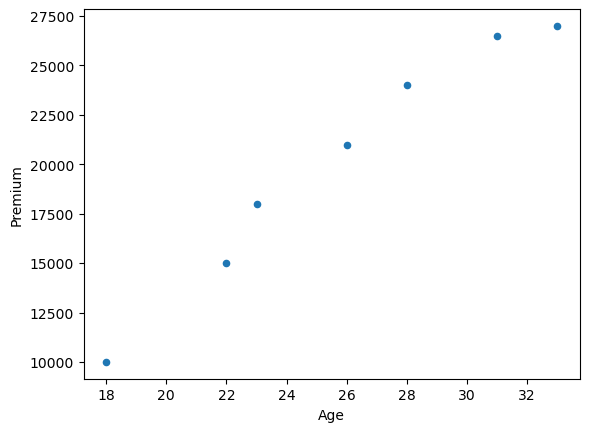

In [8]:
#Membuat scatterplot yang antara Age & Premium
df.plot(x='Age',y='Premium',kind='scatter')

1.  titik-titik pada scatterplot membentuk pola yang meningkat, maka **ada hubungan positif antara usia dan premi**. Artinya, seiring bertambahnya usia, premi cenderung meningkat. Ini bisa terjadi dalam kasus di mana premi asuransi lebih tinggi untuk individu yang lebih tua, mungkin karena peningkatan risiko kesehatan.
2.  scatterplot menunjukkan garis yang naik secara **linier**, kita dapat menyimpulkan bahwa usia adalah prediktor yang cukup kuat untuk premi, dan bahwa premi cenderung naik seiring bertambahnya usia.
3.   titik-titik tersebar lebar di sekitar garis atau pola utama, hal ini menunjukkan adanya **variabilitas yang tinggi** dalam premi yang dibayarkan oleh individu pada usia yang sama.
4.   **Tidak terdapat outlier** (tidak ada poin yang jauh dari pola umum) pada Scatterplot diatas.

In [9]:
X = df['Age']
Y = df['Premium']

In [10]:
#Membagi dataset jadi data uji & data pelatihan
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [11]:
#Menampilkan dimensi dari dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4,)
(4,)
(3,)
(3,)


In [12]:
Y = df['Premium']

In [13]:
Y.head()

0    10000
1    15000
2    18000
3    21000
4    24000
Name: Premium, dtype: int64

In [14]:
X = df['Age']
X.head()

0    18
1    22
2    23
3    26
4    28
Name: Age, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7 , random_state=0000)

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4,)
(4,)
(3,)
(3,)


In [17]:
import numpy as np
X_train = X_train.values  # Konversi dari pandas Series/DataFrame ke numpy array
X_test = X_test.values


In [18]:
X_train = X_train[:, np.newaxis]  # Ubah dari 1D ke 2D array
X_test = X_test[:, np.newaxis]

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4, 1)
(4,)
(3, 1)
(3,)


In [20]:
#mempersiapkan model Linear Regression dengan mempelajari pola dalam data pelatihan
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
print(lr.intercept_) #Menampilkan bias/konstanta pada model
print(lr.coef_) #Menampilkan koefisien regresi atau slope untuk setiap fitur (variabel independen) dalam model.

-13183.288409703491
[1303.23450135]


Dari data diatas dapat diberi percontohan semisal: 
Jika usia seseorang meningkat 1 tahun, maka premi mereka akan meningkat sebesar 1,303.23 unit (misalnya, dalam satuan mata uang).

In [22]:
#Membuat Prediksi dari hasil data yang sudah dilatih
y_pred = lr.predict(X_test)

In [23]:
type(y_pred)

numpy.ndarray

In [24]:
Y_test.shape

(3,)

Text(0, 0.5, 'Sales')

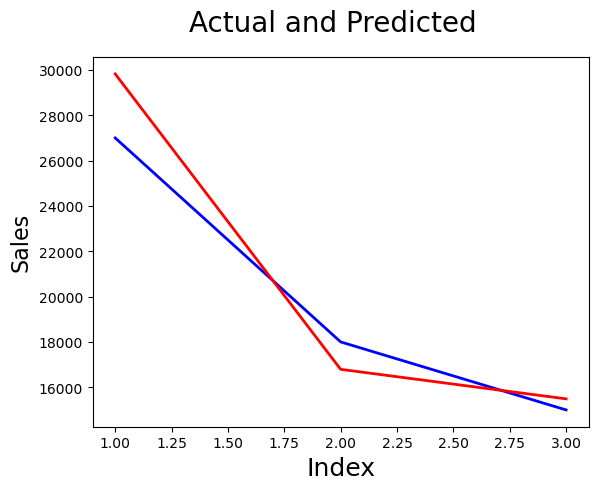

In [37]:
#membuat plot garis yang membandingkan antara nilai aktual dan nilai prediksi dari variabel target
import matplotlib.pyplot as plt
c = [i for i in range (1, 4, 1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)
         

1. Grafik ini membandingkan bagaimana nilai prediksi dari model mendekati nilai aktual pada setiap sampel.
2. garis biru (Y_test) dan garis merah (y_pred) sangat dekat atau tumpang tindih, berarti **model melakukan prediksi dengan sangat baik**.
3. pola dari prediksi (merah) mengikuti pola yang sama dengan data aktual (biru) dengan gap pola pergerakan yang tidak terlalu berbeda menunjukkan bahwa **model dapat memprediksi dengan cukup baik untuk data tersebut**.

Text(0, 0.5, 'Y_test-y_pred')

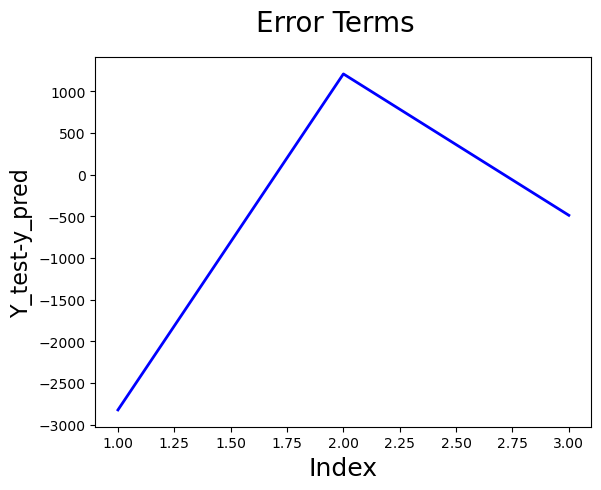

In [26]:
#membuat plot kesalahan prediksi (error terms), yaitu selisih antara nilai aktual (Y_test) dan nilai prediksi (y_pred):
c = [i for i in range (1, 4, 1)]
fig = plt.figure()
plt.plot(c,Y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Y_test-y_pred', fontsize=16)

1. Error terms menggambarkan seberapa jauh nilai prediksi dari model (y_pred) menyimpang dari nilai aktual (Y_test). Jika Y_test - y_pred mendekati nol, berarti model memberikan prediksi yang akurat.
2. Pada Sebagian Besar index, garis biru ada pada area negatif (prediksi nilai terlalu tinggi) lalu berakhir pada landai di area yang bernilai lebih positif(prediksi nilai terlalu rendah. Dapat diartikan bahwa mayoritas hasil memprediksi nilai lebih tinggi daripada yang seharusnya, jika index ditambah kemungkinan hasil akan mendekati nol (prediksi semakin akurat) dicirikan dengan kecenderungan yang makin mendekati titik nol.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)

In [28]:
r_squared = r2_score(Y_test, y_pred)

In [29]:
print('Mean_Squared_Error :',mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3223771.7443688004
r_square_value : 0.8760087790627384


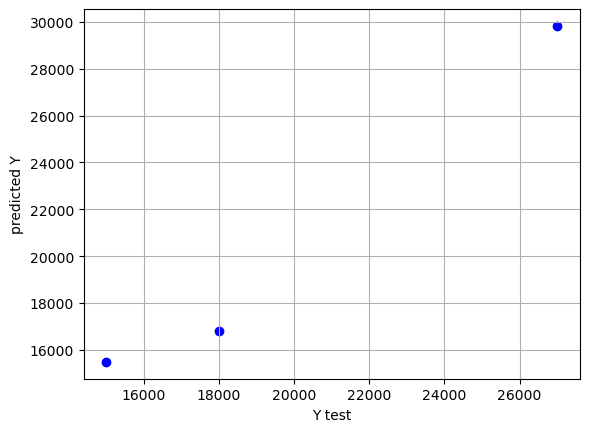

In [30]:
#membuat scatter plot yang membandingkan nilai aktual (Y_test) dengan nilai prediksi (y_pred) dari model regresi.
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred,c='blue')
plt.xlabel('Y test')
plt.ylabel('predicted Y')
plt.grid()

1. data tergambarkan dengan titik titik berada dekat dengan garis lurus Y = X, artinya model menghasilkan prediksi yang sangat akurat untuk sampel tersebut (nilai prediksi hampir sama dengan nilai aktual). 
2. satu titik tersebar jauh dari garis diagonal atau ada pola yang tidak seimbang, ini menunjukkan kesalahan prediksi yang signifikan dan mungkin ada bias atau model tidak cocok dengan data.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
#Eksekusi & Train RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [33]:
#Eksekusi & Train DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
#Melakukan prediksi
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [35]:
#Evaluasi RandomForestRegressor & DecisionTreeRegressor
rf_mse = mean_squared_error(Y_test, rf_pred)
rf_mae = mean_absolute_error(Y_test, rf_pred)
rf_r2 = r2_score(Y_test, rf_pred)

dt_mse = mean_squared_error(Y_test, dt_pred)
dt_mae = mean_absolute_error(Y_test, dt_pred)
dt_r2 = r2_score(Y_test, dt_pred)

In [36]:
#Print Hasil Evaluasi
print("RandomForestRegressor Evaluation:")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}\n")

print("DecisionTreeRegressor Evaluation:")
print(f"Mean Squared Error (MSE): {dt_mse:.4f}")
print(f"Mean Absolute Error (MAE): {dt_mae:.4f}")
print(f"R² Score: {dt_r2:.4f}")

RandomForestRegressor Evaluation:
Mean Squared Error (MSE): 1201533.3333
Mean Absolute Error (MAE): 1006.6667
R² Score: 0.9538

DecisionTreeRegressor Evaluation:
Mean Squared Error (MSE): 11416666.6667
Mean Absolute Error (MAE): 2833.3333
R² Score: 0.5609


# MSE RandomForestRegressor jauh lebih rendah (1201533.33) dibandingkan dengan DecisionTreeRegressor (11416666.67) yang memiliki arti RandomForestRegressor memiliki kesalahan kuadrat rata rata yang lebih kecil sehingga lebih akurat daripada DecisionTreeRegressor.

# MAE juga menunjukkan hasil yang lebih baik untuk RandomForestRegressor (1006.67) dibandingkan dengan DecisionTreeRegressor (2833.33) yang memiliki arti rata-rata kesalahan absolut model RandomForestRegressor lebih kecil sehingga lebih akurat daripada DecisionTreeRegressor.

# R² Score untuk RandomForestRegressor adalah 0.9538, yang menunjukkan bahwa model ini menjelaskan sekitar 95.38% dari variabilitas dalam data. Di sisi lain, R² Score untuk DecisionTreeRegressor hanya 0.5609, yang berarti model ini hanya menjelaskan sekitar 56.09% dari variabilitas. R² yang lebih tinggi pada RandomForestRegressor menunjukkan kinerja yang jauh lebih baik dalam menjelaskan data.

# Dengan MSE yang rendah dan R² yang tinggi, model ini sangat efektif dalam memprediksi variabel target, menunjukkan bahwa model dapat menangkap pola dalam data dengan baik. Maka dari itu RandomForestRegressor adalah pilihan yang lebih baik untuk tugas regresi ini.